# Makine Öğrenmesi - Polynomial Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Veriyi dataframe içerisine yüklüyorum. Download etmek için (http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

In [4]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Bu veri grubu içerisinden hangilerini seçeceğime karar vermek için corr metodunu kullanabilirim. Buradaki kolon sayısı çok fazla olmadığı için pek anlamlı olmaz. Aşağıda sonuçları görebilirsiniz.

In [16]:
df.corr()[["CO2EMISSIONS"]].dropna().abs().sort_values(by=["CO2EMISSIONS"], ascending=False)[1:]

,CO2EMISSIONS
FUELCONSUMPTION_COMB_MPG,0.906394
FUELCONSUMPTION_CITY,0.898039
FUELCONSUMPTION_COMB,0.892129
ENGINESIZE,0.874154
FUELCONSUMPTION_HWY,0.861748
CYLINDERS,0.849685


In [17]:
# Modeli eğitmek için sadece belirlediğim alanları içeren bir dataset yaratacağım
cdf=df[["FUELCONSUMPTION_COMB","ENGINESIZE","CYLINDERS","CO2EMISSIONS"]]
cdf.head()

,FUELCONSUMPTION_COMB,ENGINESIZE,CYLINDERS,CO2EMISSIONS
0,8.5,2.0,4,196
1,9.6,2.4,4,221
2,5.9,1.5,4,136
3,11.1,3.5,6,255
4,10.6,3.5,6,244


Motor hacmi ile CO2 Emisyonun ilişkisini gösteren bir grafik çizelim.

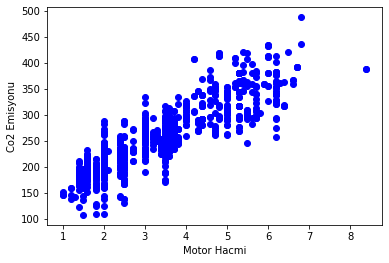

In [18]:
plt.scatter(cdf["ENGINESIZE"],cdf["CO2EMISSIONS"],color="blue")
plt.xlabel("Motor Hacmi")
plt.ylabel("Co2 Emisyonu")
plt.show()

***Train ve Test için elimizdeki verileri ikiye böleceğiz.***

In [20]:
msk=np.random.rand(len(df))<0.8 # %80 oranında rastgale True değer dönen bir dizi yarattıyoruz.
train=cdf[msk] # cdf dataframe içindeki verilerin %80 train olarak atanmış oldu.
test=cdf[~msk] # cdf dataframe içerisindeki verilerin %20'sini, train veri setine atananların dışındakileri test olarak ayırdık

Verinini doğrusal değilde bir eğri şeklinde olduğunu düşündüğümüzde veriyi açıklayan fonksiyonun polynomial fonksiyon olduğunu düşünürüz. Aşağıda görebileceğiniz üzere farklı şekillerdeki eğriler farklı derecelerde fonksiyonların çıktılarıdır. Dağılımımız hangisine benziyorsa aradığımız fonksiyon o dereceden bir fonksiyondur diye düşünebiliriz.

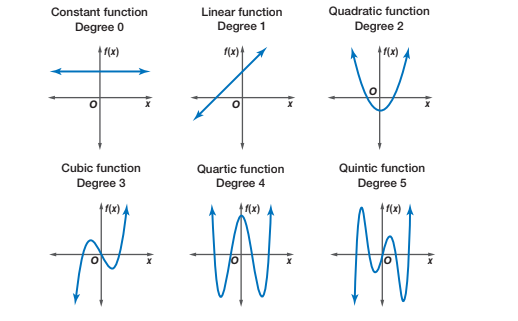

Polynomial fonksiyon analizi için Sklear içinde PolynomialFeatures() foksiyonunu kullanırız. Bu fonksiyon bize, fonksiyona parametre olarak verilmiş dereceye eşit yada küçük, independent featureların "Aşağıdaki örnekte ENGINESIZE" tüm olası polinom durumlarını içeren bir matris oluşturur. Aşağıdaki kodda 2. derece dediğimiz için <code>0. kuvveti,1. kuvveti ve 2. kuvvetinden</code> oluşan bir matris.

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly=PolynomialFeatures(degree=2)
train_x_poly=poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

Bu yeni oluşan matris değişkeninin her dereceden değerini içerdiği için problemimiz Linear Regression problemi haline geldi. Yapmamız gereken bu matris üzerinden en uygun değerleri veren Theta değerlerini bulmak haline geliyor.

***y_hat=b+Theta1*X1+Theata2*X2***

In [29]:
clf=linear_model.LinearRegression()
train_y_=clf.fit(train_x_poly,train_y)
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         49.99413743 -1.4940489 ]]
Intercept:  [108.35041419]


Buradaki Coefficent ve Intercept değerleri fonksiyonumuzu oluşturan sabit değerler. Bu değerleri kullanarak oluşan eğriyi asıl veri ile birlikte grafik üzerinde gösterecek olursak.

Text(0, 0.5, 'Emission')

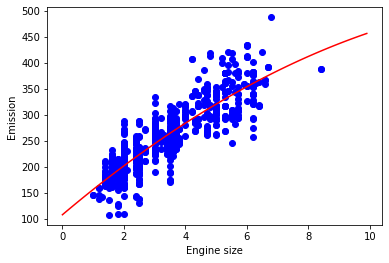

In [30]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

***Modelin Değerlendirilmesi***

In [31]:
from sklearn.metrics import r2_score

test_x_poly=poly.fit_transform(test_x)
test_y_=clf.predict(test_x_poly)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.77
Residual sum of squares (MSE): 942.47
R2-score: 0.69
